# Week 3

## California Housing Prices data from Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data -O data/housing_data_week_3.csv

--2022-09-24 18:30:39--  http://wget/
Resolviendo wget (wget)... falló: nodename nor servname provided, or not known.
wget: no se pudo resolver la dirección del equipo “wget”
--2022-09-24 18:30:39--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 1423529 (1.4M) [text/plain]
Grabando a: “data/housing_data_week_3.csv”

data/housing_data_w 100%[===================>]   1.36M  2.67MB/s    en 0.5s    

2022-09-24 18:30:41 (2.67 MB/s) - “data/housing_data_week_3.csv” guardado [1423529/1423529]

ACABADO --2022-09-24 18:30:41--
Tiempo total de reloj: 1.5s
Descargados: 1 ficheros, 1.4M en 0.5s (2.67 MB/s)


In [4]:
df = pd.read_csv('data/housing_data_week_3.csv')

## Features

In [5]:
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']

In [6]:
df = df[features]

In [7]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data preparation

#### Select only the features from above and fill in the missing values with 0.

In [8]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df = df.fillna(0)

### Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.

In [10]:
df['rooms_per_household'] = df.total_rooms / df.households

### Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.

In [11]:
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms

### Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [12]:
df['population_per_household'] = df.population / df.households

In [13]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


# Question 1

### What is the most frequent observation (mode) for the column ocean_proximity?

In [14]:
df.ocean_proximity.mode()

0    <1H OCEAN
dtype: object

## Split the data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42, )
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42, )

In [17]:
len (df), len(df_train), len(df_val), len(df_test)

(20640, 12384, 4128, 4128)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [20]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 2

### Create the correlation matrix for the numerical features of your train dataset.

### What are the two features that have the biggest correlation in this dataset?

In [21]:
df_train.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [22]:
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [23]:
numerical = ['latitude', 'longitude', 'housing_median_age', 
             'total_rooms','total_bedrooms', 'population', 
             'households', 'median_income', 'rooms_per_household', 
             'bedrooms_per_room', 'population_per_household']
categorical = ['ocean_proximity']

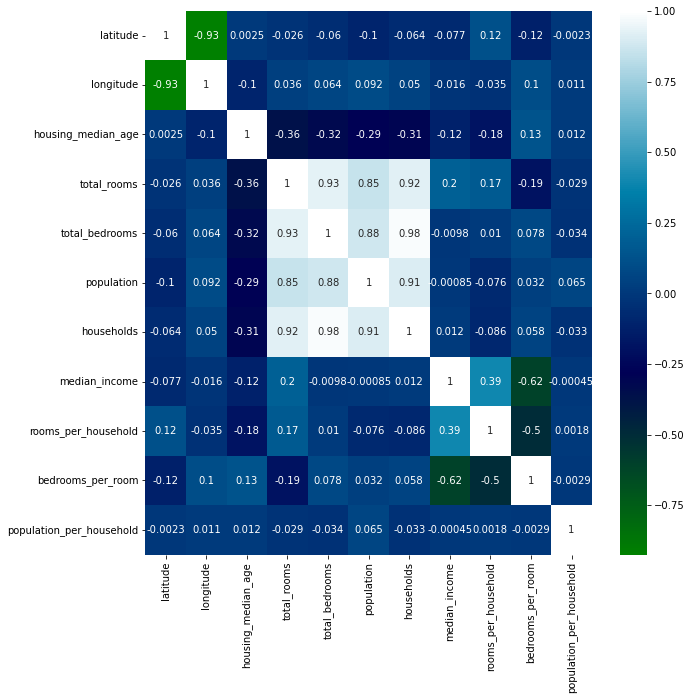

In [24]:
import seaborn as sn

plt.figure(figsize=(10,10))

sn.heatmap( df_train[numerical].corr(),
            annot = True,
            cmap = "ocean" )

plt.show()

In [25]:
#Option: total_bedrooms and households

## Make median_house_value binary

In [26]:
y_train.mean()

206807.7419250646

In [27]:
y_train_above_average = (y_train > y_train.mean()).astype(int)

In [28]:
y_train_above_average

array([1, 1, 0, ..., 1, 0, 0])

# Question 3

### Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
### What is the value of mutual information?

In [29]:
from sklearn.metrics import mutual_info_score

In [30]:
mutual_info_score(y_train_above_average, df_train.ocean_proximity)

0.10138385763624205

In [31]:
score = mutual_info_score(y_train_above_average, df_train.ocean_proximity)

In [32]:
round(score, 2)

0.1

# Question 4

### Now let's train a logistic regression
### Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
### Fit the model on the training dataset.
### Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [33]:
#One-hot encoding
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [34]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [35]:
X_train = dv.transform(train_dict)

In [36]:
#Training logistic regression
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [38]:
model.fit(X_train, y_train_above_average)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [39]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [40]:
model.predict_proba(X_val)

array([[0.91991588, 0.08008412],
       [0.82569691, 0.17430309],
       [0.04759803, 0.95240197],
       ...,
       [0.03895262, 0.96104738],
       [0.14865781, 0.85134219],
       [0.52792983, 0.47207017]])

In [41]:
y_pred = model.predict_proba(X_val)[:,1]

In [42]:
decision = (y_pred >= 0.5)

In [43]:
y_val_above_average = (y_val > y_val.mean()).astype(int)

In [44]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = decision.astype(int)
df_pred['actual'] = y_val_above_average

In [45]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [46]:
df_pred.correct.mean()

0.8367248062015504

In [47]:
round(df_pred.correct.mean(),2)

0.84

# Question 5

### Let's find the least useful feature using the feature elimination technique.
### Train a model with all these features (using the same parameters as in Q4).
### Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
### For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
### Which of following feature has the smallest difference?
### total_rooms - total_bedrooms - population - households

In [48]:
difference = {}
colums_selected = ['total_rooms', 'total_bedrooms', 'population', 'households']
for column in colums_selected:
    
    df_small_train = df_train.copy()
    df_small_val = df_val.copy()
        
    del df_small_train[column]
    del df_small_val[column]
        
    columns_small = df_small_train.columns
        
    #one-hot encoing
    train_small_dict = df_small_train[columns_small].to_dict(orient='records')

    dv_small = DictVectorizer(sparse=False)
    dv_small.fit(train_small_dict)
    X_small_train = dv_small.transform(train_small_dict)
        
    #Training logistic regression
    model_small = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model_small.fit(X_small_train, y_train_above_average)
        
    val_small_dict = df_small_val[columns_small].to_dict(orient='records')
    X_small_val = dv_small.transform(val_small_dict)
        
    model_small.predict_proba(X_small_val)
    y_small_pred = model_small.predict_proba(X_small_val)[:,1]
    decision_small = (y_small_pred >= 0.5)

    df_small_pred = pd.DataFrame()
    df_small_pred['probability'] = y_small_pred
    df_small_pred['prediction'] = decision_small.astype(int)
    df_small_pred['actual'] = y_val_above_average

    df_small_pred['correct'] = df_small_pred.prediction == df_small_pred.actual

    accurrancy = df_small_pred.correct.mean()
    
    q4_accurrancy = df_pred.correct.mean()
      
    diff = abs(accurrancy - q4_accurrancy)
    
    difference[column] = (diff , accurrancy)

In [49]:
difference

{'total_rooms': (0.0014534883720930258, 0.8381782945736435),
 'total_bedrooms': (0.0002422480620154488, 0.8369670542635659),
 'population': (0.009205426356589164, 0.8275193798449613),
 'households': (0.002664728682170603, 0.8340600775193798)}

In [50]:
min_dic = list(zip(difference.values(),difference.keys()))
sorted(min_dic)

[((0.0002422480620154488, 0.8369670542635659), 'total_bedrooms'),
 ((0.0014534883720930258, 0.8381782945736435), 'total_rooms'),
 ((0.002664728682170603, 0.8340600775193798), 'households'),
 ((0.009205426356589164, 0.8275193798449613), 'population')]

In [ ]:
# Option total_bedrooms

# Question 6

In [51]:
#linear regression model from Scikit-Learn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [52]:
#logarithmic transformation
y_log_train = np.log1p(y_train)
y_val_train = np.log1p(y_val)

In [53]:
alpha = [0, 0.01, 0.1, 1, 10]

In [54]:
scores = {}

In [55]:
for a in alpha:
    model_ridge = Ridge(alpha=a, solver="sag", random_state=42)
    model_ridge.fit(X_train, y_log_train)
    pred = model_ridge.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val_train,pred))
    scores[a]=round(rmse,3)

In [56]:
scores

{0: 0.524, 0.01: 0.524, 0.1: 0.524, 1: 0.524, 10: 0.524}

In [ ]:
# Option: 0